### Project title: Understanding the target customers for a marketing team(Customer_Segmentation.)
##### Introduction:
- Customer segmentation is the process of subdividing a market into discrete customer groups that share similar characteristics.Using this approach a company can identify its' target market(best customers),make plans on how to keep this customers and also run campaigns inorder to encourage customers with very high recency value but turn to contribute more to the company's revenue.  in monetary terms. 

### Major objective:
- The main objective of this project is to identify the most important shopping group based on income,age and spending score for a particular mall with a dataset Mall_customers_data.

### Objectives:
To achieve the major objective, the following will be done:
- Dividing mall target market into approachable groups,
- Creating a subset of the market based on demographic and behavioral criteria to better understand for marketing activities.
All of the above objectives will be accomplished using KMean clustering algorithm.

### Project outline:
- Importation of important libraries
- Data Acquisition and Cleansing
- Quick Exploratory Data Analysis,
- Clustering: Univariant,Bivariant and multivariant(Use of KMeans clustering algorithm to create segments)
- Summary on Statistical analysis,
- Visualizations.

#### 1. Importation of important libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans 

#### 2. Data Acquisition and Cleansing.

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
# Checking for empty spaces within the dataset
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

- No NaN values within the dataset.

In [5]:
# Checking for duplicates
df.duplicated().sum()

0

#### 3. Quick Exploratory Data Analysis(EDA)

In [6]:
# 1. Total number of persons that bought from this mall;
len(df)

200

##### 3.1 Univariant analysis

In [7]:
# 2.How many many males and females bought from this mall?.
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [8]:
# 3.What were the percentages of males and females that bought from this mall?.
df['Gender'].value_counts(normalize = True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

In [9]:
# 4. What was the total income acquired by this mall?.
df['Annual Income (k$)'].sum()

12112

In [10]:
# 5. What were percentages of the total income contributed by both males 
#and females? 

group_1 = df.groupby('Gender')

total = df['Annual Income (k$)'].sum()
M_income = group_1.get_group('Male')['Annual Income (k$)'].sum()
F_income = group_1.get_group('Female')['Annual Income (k$)'].sum()

M_pct = round((M_income/total)*100,2)
F_pct = round((F_income/total)*100,2)


print('Male:',M_pct,'%')
print('Female:',F_pct,'%')


Male: 45.21 %
Female: 54.79 %


<AxesSubplot:ylabel='Gender'>

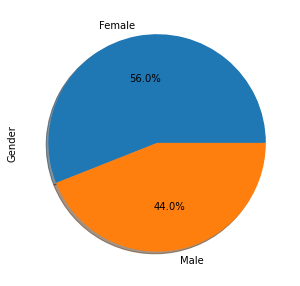

In [11]:
# 6.What were the percentages of males and females that bought from this mall?. 
plt.figure(figsize = (6,5))
df['Gender'].value_counts().plot(kind = 'pie',autopct = '%1.1f%%', shadow = True)

Text(0.5, 1.0, 'Gender counts')

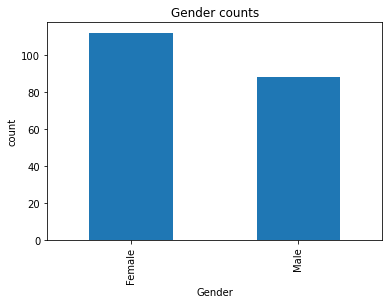

In [12]:
# 7. Creating a bar chart for gender count.
df['Gender'].value_counts().plot(kind = 'bar')
plt.xlabel('Gender')
plt.ylabel('count')
plt.title('Gender counts')

Text(0.5, 1.0, 'Gender counts')

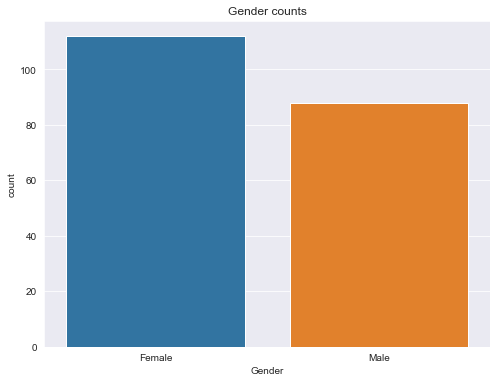

In [13]:
plt.figure(figsize = (8,6))
sns.set_style('darkgrid')
gender = df['Gender'].value_counts()
sns.barplot(x = gender.index, y = gender.values)
plt.xlabel('Gender')
plt.ylabel('count')
plt.title('Gender counts')

- Due to the fact that the number of females buying from this mall are more than the number of males,one can say that this mall contains products that are mostly needed by females.

Text(0, 0.5, 'Number')

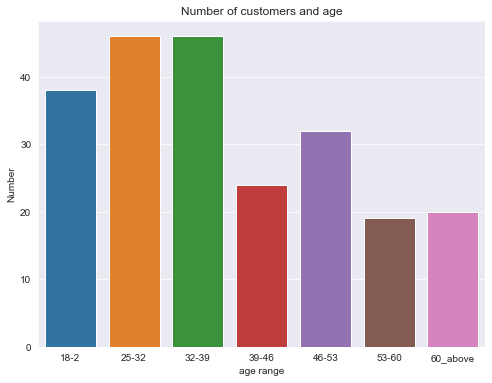

In [15]:
import numpy as np
age18_25 = df[(df['Age']>=18) & (df['Age']<=25)]
age25_32 = df[(df['Age']>=25) & (df['Age']<=32)]
age32_39 = df[(df['Age']>=32) & (df['Age']<=39)]
age39_46 = df[(df['Age']>=39) & (df['Age']<=46)]
age46_53 = df[(df['Age']>=46) & (df['Age']<=53)]
age53_60 = df[(df['Age']>=53) & (df['Age']<=60)]
age60above = df[df['Age']>=60]
plt.figure(figsize = (8,6))
sns.set_style('darkgrid')
x = np.array(['18-2','25-32','32-39','39-46','46-53','53-60','60_above'])
y = np.array([len(age18_25),len(age25_32),len(age32_39),len(age39_46),
              len(age46_53),len(age53_60),len(age60above)])
sns.barplot(x = x,y=y)
plt.title('Number of customers and age')
plt.xlabel('age range')
plt.ylabel('Number')

- From the above bar chart, most persons buying from this mall are within the age ranges 25-39 and 18-25 but only a few persons that are above 39 years of age are buying from this mall. That is old people are less interested in the products being sold by this mall as compared to the youths.

Text(0, 0.5, 'Number')

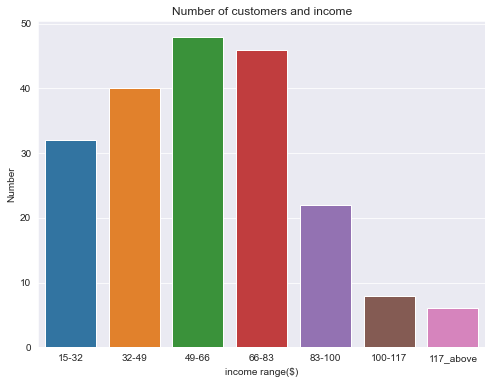

In [16]:
income15_32 = df[(df['Annual Income (k$)']>=15)&(df['Annual Income (k$)']<=32)]
income32_49 = df[(df['Annual Income (k$)']>=32)&(df['Annual Income (k$)']<=49)]
income49_66 = df[(df['Annual Income (k$)']>=49)&(df['Annual Income (k$)']<=66)]
income66_83 = df[(df['Annual Income (k$)']>=66)&(df['Annual Income (k$)']<=83)]
income83_100 = df[(df['Annual Income (k$)']>=83)&(df['Annual Income (k$)']<=100)]
income100_117 = df[(df['Annual Income (k$)']>=100)&(df['Annual Income (k$)']<=117)]
income117_above = df[(df['Annual Income (k$)']>=117)]

plt.figure(figsize = (8,6))
sns.set_style('darkgrid')
x = np.array(['15-32','32-49','49-66','66-83','83-100','100-117','117_above'])
y = np.array([len(income15_32),len(income32_49),len(income49_66),len(income66_83),
              len(income83_100),len(income100_117),len(income117_above)])
sns.barplot(x = x,y=y)
plt.title('Number of customers and income')
plt.xlabel('income range($)')
plt.ylabel('Number')


- From above it is observed that annual incomes contributed by most customers were within the ranges 49k-66k,66k-83k and 32k-49k dollars.

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
# 8. A summary of Statistical Analysis
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


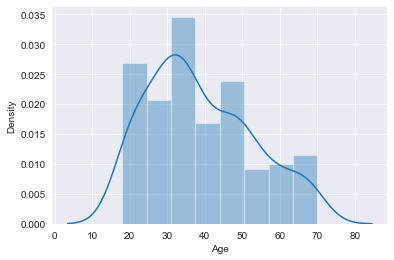

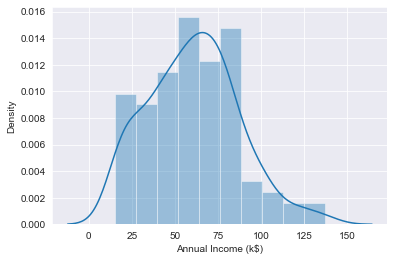

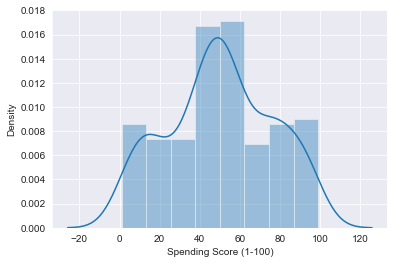

In [19]:
# 9. Using the distplot to visualize the distribution of  
#variables in the dataset
columns =['Age','Annual Income (k$)','Spending Score (1-100)'] 
for x in columns:
    plt.figure()
    sns.distplot(df[x])

- From the above distribution plots, it shows that the variables age,annual income and spending score are normally distributed.

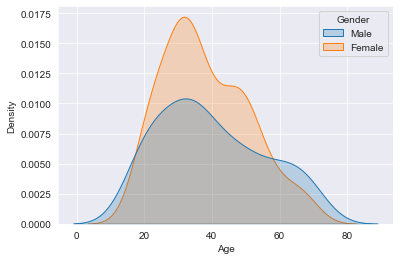

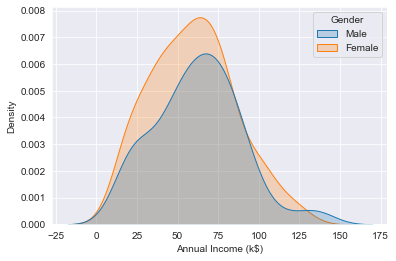

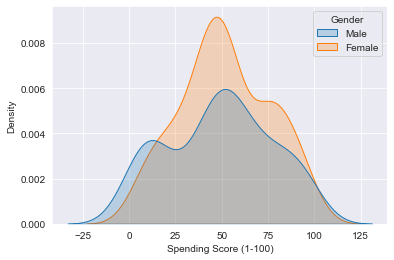

In [20]:
# 8. KDE plot.
columns =['Age','Annual Income (k$)','Spending Score (1-100)'] 
for x in columns:
    plt.figure()
    sns.kdeplot(df[x],shade = True,hue = 'Gender',data = df)

- The above KDE plots show that the variables age,annual income and spending score are normally distributed.It also show that the females are leading in terms of population.

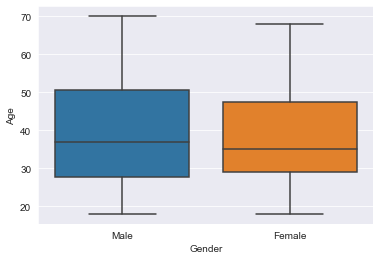

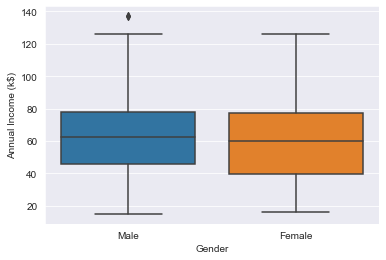

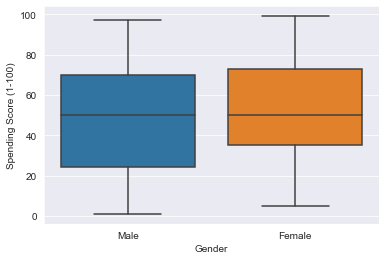

In [21]:
# 10. Boxplot
columns =['Age','Annual Income (k$)','Spending Score (1-100)'] 
for x in columns:
    plt.figure()
    sns.boxplot('Gender',x,data = df)

In [22]:
# 10. Getting the mean,min and max values of all the variables in columns for both males 
# and females.
group_2 = df.groupby('Gender')[columns].mean()


In [23]:
group_2

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


- The above box plots gives information about the statistical parameter,the MEAN for the variables age,annual income and spending score. This information is summarized for both females and males as shown in the table above.

In [24]:
group_3 = df.groupby('Gender')[columns].min()


In [25]:
group_3

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,18,16,5
Male,18,15,1


In [26]:
group_4 = df.groupby('Gender')[columns].max()


In [27]:
group_4

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,68,126,99
Male,70,137,97


##### 3.2 Bivariant analysis

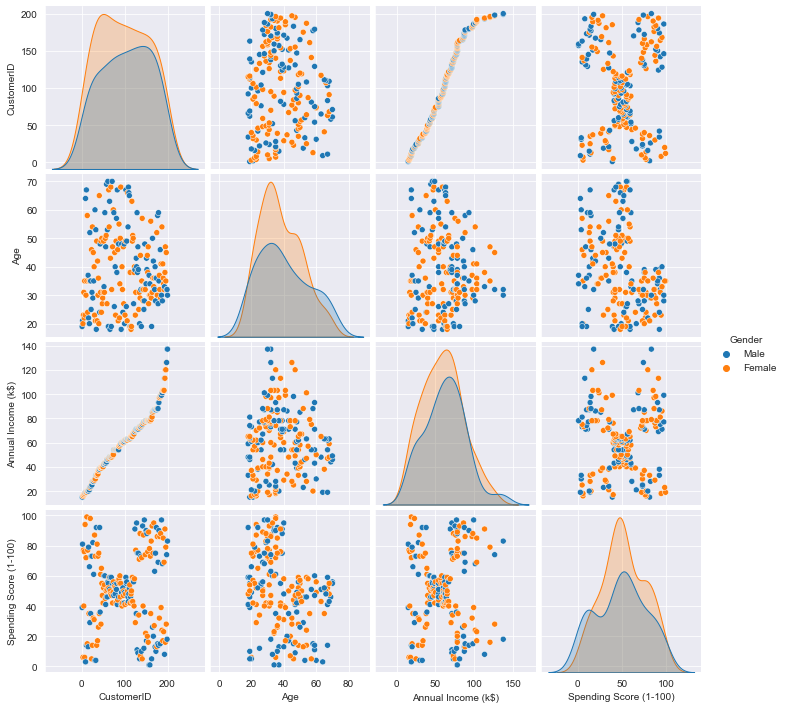

In [28]:
# Pairplots
sns.pairplot(df, hue = 'Gender', data = df)

In [29]:
# correlation
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<AxesSubplot:>

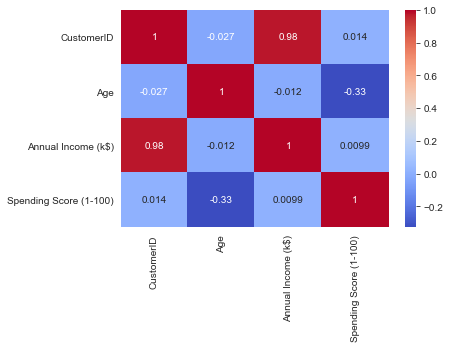

In [30]:
sns.heatmap(df.corr(),annot = True,cmap = 'coolwarm')

- Between the spending score and annual income there exist a positive but week correlation while between age and spending score, there exis negative correlation meaning that the spending score decreases with an increase in age.

#### 4. Clustering: Univariant,Bivariant and multivariant

##### 4.1 Univariant clustering(Based on income)

In [31]:
df_3 = pd.read_csv('Mall_Customers.csv') 

In [32]:
# step 1: creating a clustering algorithm
Kmeans = KMeans(n_clusters = 3)

In [33]:
# step 2: Fitting data into the algorithm
Kmeans.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [34]:
Kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [35]:
# step 3: Adding the labels to the dataset.
df_3['income cluster'] = Kmeans.labels_

In [36]:
df_3

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),income cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,2
197,198,Male,32,126,74,2
198,199,Male,32,137,18,2


In [37]:
df_3['income cluster'].value_counts(normalize = True)

0    0.46
1    0.36
2    0.18
Name: income cluster, dtype: float64

In [38]:
# step 4: Optimizing the number of clusters using the Elbow method
cluster_inertia = []
for i in range(1,11):
    Kmeans = KMeans(n_clusters = i)
    Kmeans.fit(df[['Annual Income (k$)']])
    cluster_inertia.append(Kmeans.inertia_)
    
    

In [39]:
cluster_inertia

[137277.2800000002,
 48660.88888888887,
 23517.33093093092,
 13278.112713472474,
 8481.49619047619,
 5050.904761904766,
 3931.9880952380995,
 2897.7750305250297,
 2168.478715728716,
 1758.1453823953825]

Text(0.5, 0, 'no. of clusters')

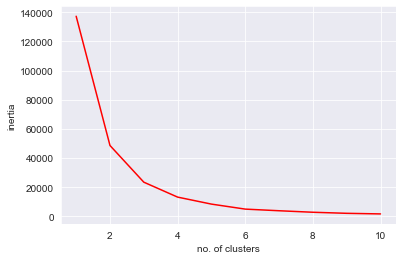

In [40]:
# Elbow plot
import numpy as np
i = np.arange(1,11)
plt.plot(i,cluster_inertia,c = 'r')
plt.ylabel('inertia')
plt.xlabel('no. of clusters')

In [41]:
group_4 = df_3.groupby('income cluster')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean()

In [42]:
group_4

,Age,Annual Income (k$),Spending Score (1-100)
income cluster,,,
0,39.184783,66.717391,50.054348
1,38.930556,33.027778,50.166667
2,37.833333,99.888889,50.638889


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

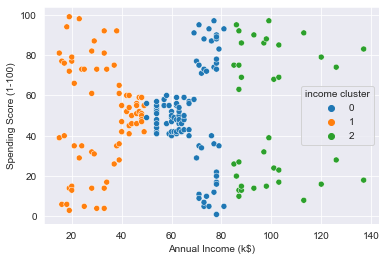

In [43]:
sns.scatterplot(df['Annual Income (k$)'],df['Spending Score (1-100)'],
                hue = 'income cluster', data = df_3,palette = 'tab10')

##### 4.2: Bivariant clustering(Based on spending score and annual income)

In [44]:
#step 1: Creating a clustering algorithm
clustering3 = KMeans(n_clusters = 5)

In [45]:
# step 2: Fitting data into the algorithm
clustering3.fit(df[['Spending Score (1-100)','Annual Income (k$)']])

KMeans(n_clusters=5)

In [46]:
# step 3: Checking for clusters labels
clustering3.labels_

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1,
       4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 0, 1, 0, 3, 0, 3, 0,
       1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0])

In [47]:
# step 4: Optimizing the number of clusters using the Elbow method
clustering_inertia2 = []
for i in range(1,11):
    clustering2 = KMeans(n_clusters = i)
    clustering2.fit(df[['Spending Score (1-100)','Annual Income (k$)']])
    clustering_inertia2.append(clustering2.inertia_)
    

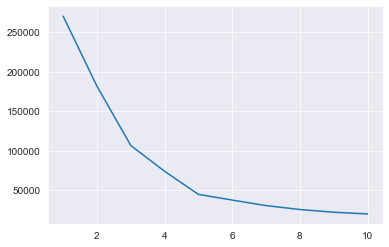

In [48]:
x = np.arange(1,11)
plt.plot(x,clustering_inertia2)

In [49]:
# step 5: Adding clusters labels to the dataset.
df_3['spending and inccome cluster'] = clustering3.labels_

In [50]:
# step 6: locating clusters centers
clustering3.cluster_centers_

array([[82.12820513, 86.53846154],
       [49.51851852, 55.2962963 ],
       [79.36363636, 25.72727273],
       [17.11428571, 88.2       ],
       [20.91304348, 26.30434783]])

In [51]:
centers = pd.DataFrame(clustering3.cluster_centers_,columns = ['x','y'])

In [52]:
centers

,x,y
0,82.128205,86.538462
1,49.518519,55.296296
2,79.363636,25.727273
3,17.114286,88.200000
4,20.913043,26.304348


In [53]:
df_3

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),income cluster,spending and inccome cluster
0,1,Male,19,15,39,1,4
1,2,Male,21,15,81,1,2
2,3,Female,20,16,6,1,4
3,4,Female,23,16,77,1,2
4,5,Female,31,17,40,1,4
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2,0
196,197,Female,45,126,28,2,3
197,198,Male,32,126,74,2,0
198,199,Male,32,137,18,2,3


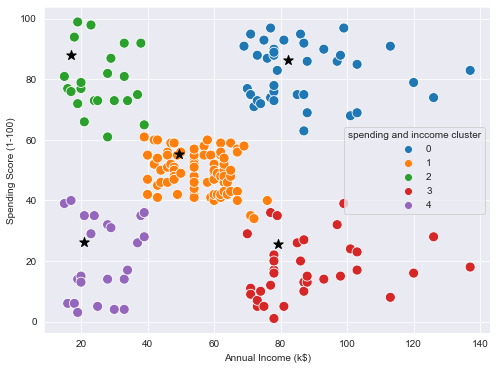

In [54]:
# step 7: Clustering customers based on annual income and spending score.

plt.figure(figsize = (8,6))

sns.scatterplot(df['Annual Income (k$)'],df['Spending Score (1-100)'],
                hue ='spending and inccome cluster',s = 100 , data = df_3,palette = 'tab10')
plt.scatter(centers['x'],centers['y'],s = 100,marker = '*',c = 'black')


In [55]:
group_5 = df_3.groupby('spending and inccome cluster')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean()

In [56]:
group_5

,Age,Annual Income (k$),Spending Score (1-100)
spending and inccome cluster,,,
0,32.692308,86.538462,82.128205
1,42.716049,55.296296,49.518519
2,25.272727,25.727273,79.363636
3,41.114286,88.200000,17.114286
4,45.217391,26.304348,20.913043


In [57]:
# step 8: Identifying the number of males and females per cluster.

pd.crosstab(df_3['spending and inccome cluster'],df_3['Gender'], normalize = 'index')

Gender,Female,Male
spending and inccome cluster,,
0,0.538462,0.461538
1,0.592593,0.407407
2,0.590909,0.409091
3,0.457143,0.542857
4,0.608696,0.391304


##### 4.3. Multivariant clustering

In [58]:
#step 1: Creating a clustering algorithm
clustering4 = KMeans(n_clusters = 4)

In [59]:
# step 2: Fitting data into the algorithm
clustering4.fit(df[['Age','Spending Score (1-100)','Annual Income (k$)']])

KMeans(n_clusters=4)

In [60]:
# step 3: Checking for clusters labels
clustering4.labels_

array([0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [61]:
#step 4: Adding cluster labels to dataset
df_3['Age,spending and annual income cluster'] = clustering4.labels_

In [62]:
# step 5: Optimizing the number of clusters using the Elbow method
clustering_inertia3 = []
for i in range(1,11):
    clustering1 = KMeans(n_clusters = i)
    clustering1.fit(df[['Age','Spending Score (1-100)','Annual Income (k$)']])
    clustering_inertia3.append(clustering1.inertia_)

In [63]:
clustering_inertia3

[308812.78,
 212840.16982097193,
 143342.75157170597,
 104366.151455562,
 75363.74835182933,
 58300.443321590676,
 51082.54296792138,
 44344.949801777206,
 40573.69766497867,
 37074.79840267402]

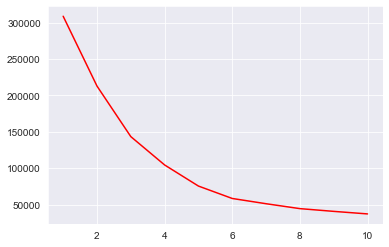

In [64]:
x = np.arange(1,11)
plt.plot(x,clustering_inertia3, c = 'r')

In [65]:
df_3

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),income cluster,spending and inccome cluster,"Age,spending and annual income cluster"
0,1,Male,19,15,39,1,4,0
1,2,Male,21,15,81,1,2,0
2,3,Female,20,16,6,1,4,2
3,4,Female,23,16,77,1,2,0
4,5,Female,31,17,40,1,4,2
...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2,0,1
196,197,Female,45,126,28,2,3,3
197,198,Male,32,126,74,2,0,1
198,199,Male,32,137,18,2,3,3


In [66]:
# step 6: locating clusters centers
clustering4.cluster_centers_

array([[24.82142857, 74.25      , 28.71428571],
       [32.69230769, 82.12820513, 86.53846154],
       [44.89473684, 42.63157895, 48.70526316],
       [40.39473684, 18.63157895, 87.        ]])

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

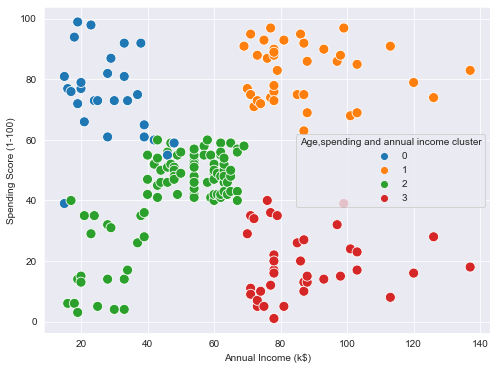

In [67]:
# step 6: Clustering customers based on annual income and spending score.

plt.figure(figsize = (8,6))

sns.scatterplot(df['Annual Income (k$)'],df['Spending Score (1-100)'],
                hue ='Age,spending and annual income cluster',s = 100 , data = df_3,palette = 'tab10')

### 5. Visualization

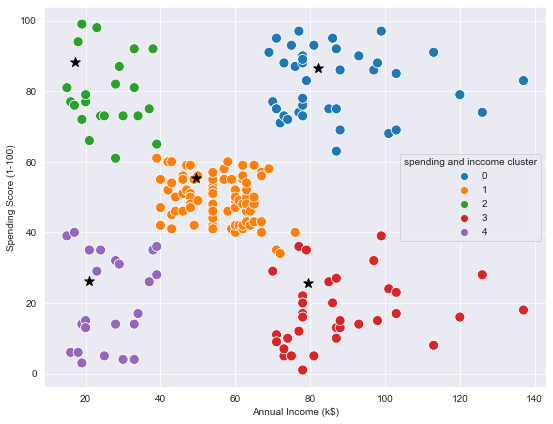

In [68]:
# step 7: Clustering customers based on annual income and spending score.

plt.figure(figsize = (9,7))

sns.scatterplot(df['Annual Income (k$)'],df['Spending Score (1-100)'],
                hue ='spending and inccome cluster',s = 100 , data = df_3,palette = 'tab10')
plt.scatter(centers['x'],centers['y'],s = 100,marker = '*',c = 'black')


### 6. Analysis of Results
It is observed that the mall customers can be grouped into 5 clusters based on their purchases made in the mall.
- Cluster 3 shows customers with low annual income and low spending score. This are people with low salaries and the mall will be less interested in people belonging to this clusters.
- Cluster 0 shows people with low annual income but high spending. This are people who love to buy products more often even though they have low salaries.Therefore such persons are satisfied with products being sold by this mall. Even though the will not effectively target them but it will still not wanr to lose them.
- Cluster 4 shows people with average annual income and average spending score. Even though these people will not still be the prime target but the mall will not still want to lose them.The will have to deploy some market strategies to increase their spending score.
- Cluster 2 shows customers with high annual income and high spending scores.These customers are the prime source of profit to the mall and hence the prime target to the mall.
- Cluster 1 shows customers with high annual income but low spending score may be this are the people with high salaries that are unsatisfied or unhappy by the mall services. These customers can be the target of the mall as they have the potential to spend money. So the mall will try to add new facilities so as to attracts these customers and meet up with their needs.

### 7. Conclusion
- Therefore the mall should target customers with high annuall income and spending score belonging to cluster 1  and customers with high annual income and low spending score belonging to cluster 2.


### 8. References
- dataset = https://www.kaggle.com/Mall_Customers_data.csv
- https://towardsdatascience.com/mall-customers-segmentation-using-machine-learning
- https://www.kdnuggets.com

In [69]:
import jovian

In [70]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "abehsongkiss/customer-segmentation-using-unsupervised-ml" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/abehsongkiss/customer-segmentation-using-unsupervised-ml


'https://jovian.ai/abehsongkiss/customer-segmentation-using-unsupervised-ml'